# HTX Hackathon Use Case - San Francisco Crime Data

Add Weather using meteos

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import meteostat

In [2]:
DATA_DIR = os.path.join(os.environ["HOME"], "Datasets","HTX_Hackathon","San_Francisco_Crimes")

# Read Data
## Binary Target Dataset

In [3]:
sfcrime = pd.read_csv(os.path.join(DATA_DIR, "SF_Crime_Hotspot.csv"))
# sfcrime.rename(columns = {"X":"LON","Y":"LAT"}, inplace = True)
sfcrime["DayOfWeek"] = sfcrime["DayOfWeek"].str.upper()
# set date type
sfcrime["Dates"] = pd.to_datetime(sfcrime["Dates"])

display(sfcrime.shape)
display(sfcrime.head())

(878049, 15)

,Dates,Category,Descript,DayOfWeek,PdDistrict,LON,LAT,Category2,PREMISE,INTERSECTION,DAY_OF_MONTH,MONTH,HOUR,HEX_ID,HOTSPOT
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,WEDNESDAY,NORTHERN,-122.425892,37.774599,WARRANTS,STREET,1,13,5,23,8a2830828327fff,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,WEDNESDAY,NORTHERN,-122.425892,37.774599,OTHER OFFENSES,STREET,1,13,5,23,8a2830828327fff,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,WEDNESDAY,NORTHERN,-122.424363,37.800414,OTHER OFFENSES,STREET,1,13,5,23,8a283082b3affff,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,WEDNESDAY,NORTHERN,-122.426995,37.800873,LARCENY/THEFT,BUILDING,0,13,5,23,8a283082b227fff,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,WEDNESDAY,PARK,-122.438738,37.771541,LARCENY/THEFT,BUILDING,0,13,5,23,8a283082d6c7fff,0


## Multiclass Dataset

In [4]:
sfcrime_multicl = pd.read_csv(os.path.join(DATA_DIR, "SF_Crime_Hotspot_Multiclass.csv"))
# sfcrime.rename(columns = {"X":"LON","Y":"LAT"}, inplace = True)
sfcrime_multicl["DayOfWeek"] = sfcrime_multicl["DayOfWeek"].str.upper()
# set date type
sfcrime_multicl["Dates"] = pd.to_datetime(sfcrime_multicl["Dates"])

display(sfcrime_multicl.shape)
display(sfcrime_multicl.head())

(878049, 15)

,Dates,Category,Descript,DayOfWeek,PdDistrict,LON,LAT,Category2,PREMISE,INTERSECTION,DAY_OF_MONTH,MONTH,HOUR,HEX_ID,HOTSPOT_CLASS
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,WEDNESDAY,NORTHERN,-122.425892,37.774599,WARRANTS,STREET,1,13,5,23,8a2830828327fff,WARM
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,WEDNESDAY,NORTHERN,-122.425892,37.774599,OTHER OFFENSES,STREET,1,13,5,23,8a2830828327fff,WARM
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,WEDNESDAY,NORTHERN,-122.424363,37.800414,OTHER OFFENSES,STREET,1,13,5,23,8a283082b3affff,WARM
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,WEDNESDAY,NORTHERN,-122.426995,37.800873,LARCENY/THEFT,BUILDING,0,13,5,23,8a283082b227fff,WARM
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,WEDNESDAY,PARK,-122.438738,37.771541,LARCENY/THEFT,BUILDING,0,13,5,23,8a283082d6c7fff,WARM


# Create New Date Feature
## Binary Dataset

In [5]:
sfcrime_df = sfcrime.copy()

sfcrime_df["DATE"] = sfcrime_df["Dates"].dt.date

display(sfcrime_df.shape)
display(sfcrime_df.head())

(878049, 16)

,Dates,Category,Descript,DayOfWeek,PdDistrict,LON,LAT,Category2,PREMISE,INTERSECTION,DAY_OF_MONTH,MONTH,HOUR,HEX_ID,HOTSPOT,DATE
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,WEDNESDAY,NORTHERN,-122.425892,37.774599,WARRANTS,STREET,1,13,5,23,8a2830828327fff,0,2015-05-13
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,WEDNESDAY,NORTHERN,-122.425892,37.774599,OTHER OFFENSES,STREET,1,13,5,23,8a2830828327fff,0,2015-05-13
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,WEDNESDAY,NORTHERN,-122.424363,37.800414,OTHER OFFENSES,STREET,1,13,5,23,8a283082b3affff,0,2015-05-13
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,WEDNESDAY,NORTHERN,-122.426995,37.800873,LARCENY/THEFT,BUILDING,0,13,5,23,8a283082b227fff,0,2015-05-13
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,WEDNESDAY,PARK,-122.438738,37.771541,LARCENY/THEFT,BUILDING,0,13,5,23,8a283082d6c7fff,0,2015-05-13


## Multiclass Dataset

In [6]:
sfcrime_multicl_df = sfcrime_multicl.copy()

sfcrime_multicl_df["DATE"] = sfcrime_multicl_df["Dates"].dt.date

display(sfcrime_multicl_df.shape)
display(sfcrime_multicl_df.head())

(878049, 16)

,Dates,Category,Descript,DayOfWeek,PdDistrict,LON,LAT,Category2,PREMISE,INTERSECTION,DAY_OF_MONTH,MONTH,HOUR,HEX_ID,HOTSPOT_CLASS,DATE
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,WEDNESDAY,NORTHERN,-122.425892,37.774599,WARRANTS,STREET,1,13,5,23,8a2830828327fff,WARM,2015-05-13
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,WEDNESDAY,NORTHERN,-122.425892,37.774599,OTHER OFFENSES,STREET,1,13,5,23,8a2830828327fff,WARM,2015-05-13
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,WEDNESDAY,NORTHERN,-122.424363,37.800414,OTHER OFFENSES,STREET,1,13,5,23,8a283082b3affff,WARM,2015-05-13
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,WEDNESDAY,NORTHERN,-122.426995,37.800873,LARCENY/THEFT,BUILDING,0,13,5,23,8a283082b227fff,WARM,2015-05-13
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,WEDNESDAY,PARK,-122.438738,37.771541,LARCENY/THEFT,BUILDING,0,13,5,23,8a283082d6c7fff,WARM,2015-05-13


# Add Weather Features
## Import Required Weather Packages

In [7]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

## Calculate the Center of San Francisco

Calculate mean of Latitude and Longitude

In [8]:
avg_latitude = np.mean(sfcrime_df["LAT"])
avg_longitude = np.mean(sfcrime_df["LON"])

print("Mean LAT: ", avg_latitude)
print("Mean LON: ", avg_longitude)

Mean LAT:  37.771020298011834
Mean LON:  -122.42261645504156


In [9]:
# get the start and end dates
min_date = min(sfcrime_df["DATE"])
max_date = max(sfcrime_df["DATE"])

print("Min Date: ", min_date)
print("Max Date: ", max_date)

Min Date:  2003-01-06
Max Date:  2015-05-13


In [10]:
# Set time period
start_date = datetime(2003, 1, 6)
end_date = datetime(2015, 5, 13)

# san francisco elev is 16 meters
san_francisco_elev = 16

# Create Point for Vancouver, BC
sf_coords = Point(avg_latitude, avg_longitude, san_francisco_elev)

# Get daily data for 2018
daily_data = Daily(sf_coords, start_date, end_date)
daily_data = daily_data.fetch()

display(daily_data.head())

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2003-01-06,14.3,8.2,19.9,0.0,NaN,110.0,13.0,NaN,1019.3,0.0
2003-01-07,11.0,3.8,17.7,0.0,NaN,NaN,7.6,NaN,1019.9,0.0
2003-01-08,9.3,4.3,14.3,0.0,NaN,NaN,6.1,NaN,1016.7,0.0
2003-01-09,11.6,9.3,13.8,12.2,NaN,NaN,10.8,NaN,1016.1,0.0
2003-01-10,13.8,11.6,16.0,4.3,NaN,157.0,15.5,NaN,1017.2,0.0


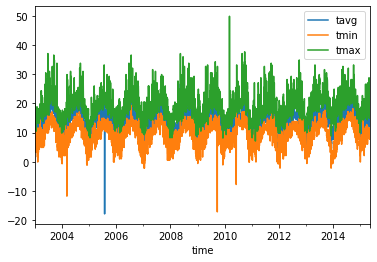

In [11]:
# Plot line chart including average, minimum and maximum temperature
daily_data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [12]:
daily_weather_data = daily_data.copy().reset_index()
daily_weather_data.rename(columns={"time": "DATE"}, inplace = True)

# select columns
daily_weather_data = daily_weather_data[["DATE","tavg",
                                         "tmin","tmax",
                                         "prcp","wspd",
                                        "pres","tsun"]]


daily_weather_data["DATE"] = pd.to_datetime(daily_weather_data["DATE"])

display(daily_weather_data.head())

,DATE,tavg,tmin,tmax,prcp,wspd,pres,tsun
0,2003-01-06,14.3,8.2,19.9,0.0,13.0,1019.3,0.0
1,2003-01-07,11.0,3.8,17.7,0.0,7.6,1019.9,0.0
2,2003-01-08,9.3,4.3,14.3,0.0,6.1,1016.7,0.0
3,2003-01-09,11.6,9.3,13.8,12.2,10.8,1016.1,0.0
4,2003-01-10,13.8,11.6,16.0,4.3,15.5,1017.2,0.0


# Rejoin Data
## Binary Target Dataset

In [13]:
sfcrime_df["DATE"] = pd.to_datetime(sfcrime_df["DATE"])
sfcrime_joined_df = sfcrime_df.merge(daily_weather_data, how = "inner", on = "DATE")

display(sfcrime_joined_df.shape)
display(sfcrime_joined_df.head())

sfcrime_joined_df.to_csv(os.path.join(DATA_DIR, 
                                      "SF_Crimes_Hotspot_Weather.csv"), index = False)

(878049, 23)

,Dates,Category,Descript,DayOfWeek,PdDistrict,LON,LAT,Category2,PREMISE,INTERSECTION,...,HEX_ID,HOTSPOT,DATE,tavg,tmin,tmax,prcp,wspd,pres,tsun
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,WEDNESDAY,NORTHERN,-122.425892,37.774599,WARRANTS,STREET,1,...,8a2830828327fff,0,2015-05-13,13.6,10.5,17.1,0.0,19.4,1014.0,NaN
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,WEDNESDAY,NORTHERN,-122.425892,37.774599,OTHER OFFENSES,STREET,1,...,8a2830828327fff,0,2015-05-13,13.6,10.5,17.1,0.0,19.4,1014.0,NaN
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,WEDNESDAY,NORTHERN,-122.424363,37.800414,OTHER OFFENSES,STREET,1,...,8a283082b3affff,0,2015-05-13,13.6,10.5,17.1,0.0,19.4,1014.0,NaN
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,WEDNESDAY,NORTHERN,-122.426995,37.800873,LARCENY/THEFT,BUILDING,0,...,8a283082b227fff,0,2015-05-13,13.6,10.5,17.1,0.0,19.4,1014.0,NaN
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,WEDNESDAY,PARK,-122.438738,37.771541,LARCENY/THEFT,BUILDING,0,...,8a283082d6c7fff,0,2015-05-13,13.6,10.5,17.1,0.0,19.4,1014.0,NaN


## Multiclass Target Dataset

In [14]:
sfcrime_multicl_df["DATE"] = pd.to_datetime(sfcrime_multicl_df["DATE"])
sfcrime_joined_multicl_df = sfcrime_multicl_df.merge(daily_weather_data, how = "inner", on = "DATE")

display(sfcrime_joined_multicl_df.shape)
display(sfcrime_joined_multicl_df.head())

sfcrime_joined_multicl_df.to_csv(os.path.join(DATA_DIR, 
                                              "SF_Crimes_Hotspot_Multicl_Weather.csv"), index = False)

(878049, 23)

,Dates,Category,Descript,DayOfWeek,PdDistrict,LON,LAT,Category2,PREMISE,INTERSECTION,...,HEX_ID,HOTSPOT_CLASS,DATE,tavg,tmin,tmax,prcp,wspd,pres,tsun
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,WEDNESDAY,NORTHERN,-122.425892,37.774599,WARRANTS,STREET,1,...,8a2830828327fff,WARM,2015-05-13,13.6,10.5,17.1,0.0,19.4,1014.0,NaN
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,WEDNESDAY,NORTHERN,-122.425892,37.774599,OTHER OFFENSES,STREET,1,...,8a2830828327fff,WARM,2015-05-13,13.6,10.5,17.1,0.0,19.4,1014.0,NaN
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,WEDNESDAY,NORTHERN,-122.424363,37.800414,OTHER OFFENSES,STREET,1,...,8a283082b3affff,WARM,2015-05-13,13.6,10.5,17.1,0.0,19.4,1014.0,NaN
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,WEDNESDAY,NORTHERN,-122.426995,37.800873,LARCENY/THEFT,BUILDING,0,...,8a283082b227fff,WARM,2015-05-13,13.6,10.5,17.1,0.0,19.4,1014.0,NaN
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,WEDNESDAY,PARK,-122.438738,37.771541,LARCENY/THEFT,BUILDING,0,...,8a283082d6c7fff,WARM,2015-05-13,13.6,10.5,17.1,0.0,19.4,1014.0,NaN
